Dataset Loaded. Shape: (999, 10)

Columns in the dataset: Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

Sample Data:
   Unnamed: 0        asin   helpful  overall  \
0           0  0528881469    [0, 0]      5.0   
1           1  0528881469  [12, 15]      1.0   
2           2  0528881469  [43, 45]      3.0   
3           3  0528881469   [9, 10]      2.0   
4           4  0528881469    [0, 0]      1.0   

                                          reviewText   reviewTime  \
0  We got this GPS for my husband who is an (OTR)...   06 2, 2013   
1  I'm a professional OTR truck driver, and I bou...  11 25, 2010   
2  Well, what can I say.  I've had this unit in m...   09 9, 2010   
3  Not going to write a long review, even thought...  11 24, 2010   
4  I've had mine for a year and here's what we go...  09 29, 2011   

       reviewerID              reviewerName  \
0   AO94D

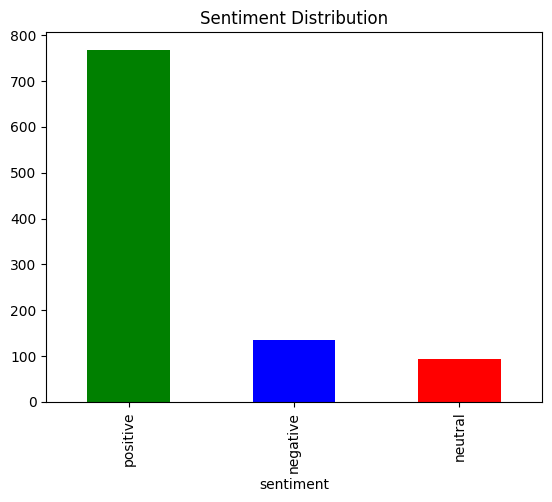

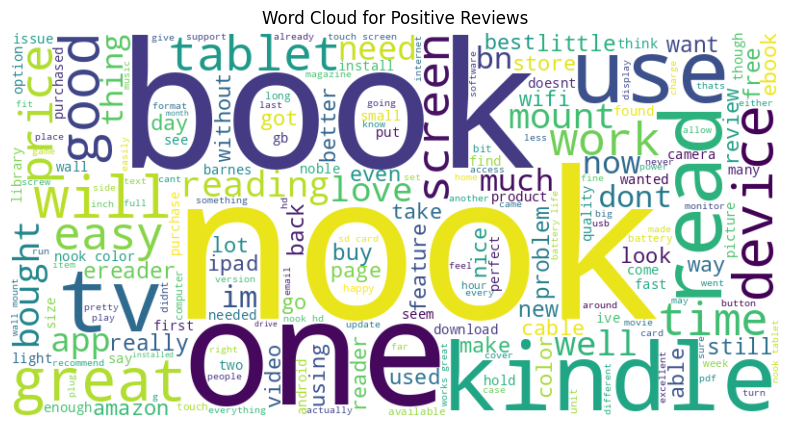

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After SMOTE:
sentiment
positive    768
negative    768
neutral     768
Name: count, dtype: int64

Accuracy Score: 0.9088937093275488

Confusion Matrix:
 [[131   0  19]
 [  0 151  14]
 [  5   4 137]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.87      0.92       150
     neutral       0.97      0.92      0.94       165
    positive       0.81      0.94      0.87       146

    accuracy                           0.91       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.92      0.91      0.91       461


Processed dataset saved as 'processed_amazon_reviews.csv'.


In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Load the Dataset
df = pd.read_csv('/amazon_reviews.csv')
print("Dataset Loaded. Shape:", df.shape)

# Step 2: Inspect the Dataset
print("\nColumns in the dataset:", df.columns)
print("\nSample Data:")
print(df.head())

# Step 3: Drop Missing Values in 'reviewText'
df = df.dropna(subset=['reviewText'])
print("\nShape after dropping missing values:", df.shape)

# Step 4: Assign Sentiments Based on Ratings
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(assign_sentiment)

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Step 5: Preprocess Text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

df['cleaned_reviews'] = df['reviewText'].apply(clean_text)
print("\nSample Cleaned Reviews:")
print(df[['reviewText', 'cleaned_reviews']].head())

# Step 6: Visualize Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Distribution')
plt.show()

# Step 7: Generate a Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Step 8: Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['cleaned_reviews']).toarray()

# Step 9: Handle Class Imbalance with SMOTE
y = df['sentiment']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 10: Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 11: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
model.fit(X_train, y_train)

# Step 12: Evaluate the Model
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 13: Save the Processed Dataset (Optional)
df.to_csv('processed_amazon_reviews.csv', index=False)
print("\nProcessed dataset saved as 'processed_amazon_reviews.csv'.")


# Review anlysis over 1000 datset using random forest methodh

Dataset Loaded. Shape: (999, 10)

Columns in the dataset: Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

Sample Data:
   Unnamed: 0        asin   helpful  overall  \
0           0  0528881469    [0, 0]      5.0   
1           1  0528881469  [12, 15]      1.0   
2           2  0528881469  [43, 45]      3.0   
3           3  0528881469   [9, 10]      2.0   
4           4  0528881469    [0, 0]      1.0   

                                          reviewText   reviewTime  \
0  We got this GPS for my husband who is an (OTR)...   06 2, 2013   
1  I'm a professional OTR truck driver, and I bou...  11 25, 2010   
2  Well, what can I say.  I've had this unit in m...   09 9, 2010   
3  Not going to write a long review, even thought...  11 24, 2010   
4  I've had mine for a year and here's what we go...  09 29, 2011   

       reviewerID              reviewerName  \
0   AO94D

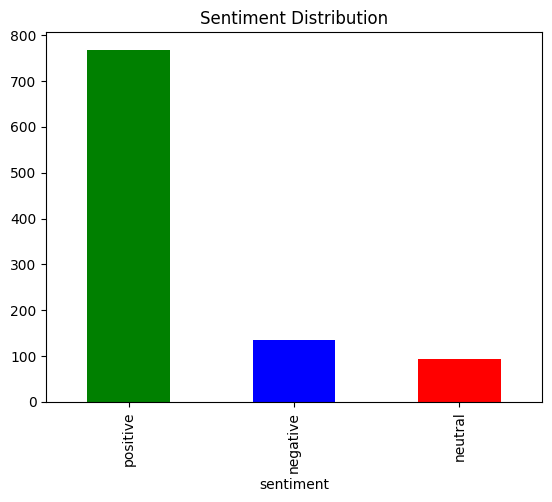

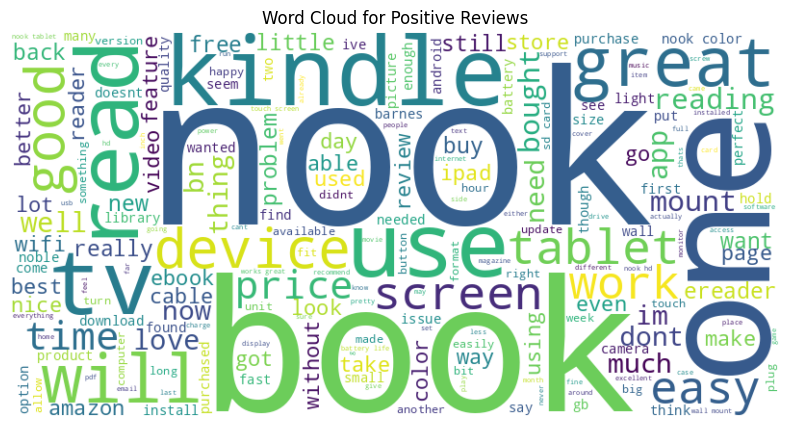

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After SMOTE:
2    768
0    768
1    768
Name: count, dtype: int64
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_split=5,

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from xgboost import XGBClassifier

# Step 1: Load the Dataset
df = pd.read_csv('/amazon_reviews.csv')
print("Dataset Loaded. Shape:", df.shape)

# Step 2: Inspect the Dataset
print("\nColumns in the dataset:", df.columns)
print("\nSample Data:")
print(df.head())

# Step 3: Drop Missing Values in 'reviewText'
df = df.dropna(subset=['reviewText'])
print("\nShape after dropping missing values:", df.shape)

# Step 4: Assign Sentiments Based on Ratings
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(assign_sentiment)

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Step 5: Preprocess Text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

df['cleaned_reviews'] = df['reviewText'].apply(clean_text)
print("\nSample Cleaned Reviews:")
print(df[['reviewText', 'cleaned_reviews']].head())

# Step 6: Visualize Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Distribution')
plt.show()

# Step 7: Generate a Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Step 8: Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['cleaned_reviews']).toarray()

# Step 9: Encode Sentiments
encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])  # Encode sentiments to 0, 1, 2 for 'negative', 'neutral', 'positive'

# Step 10: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 11: Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 12: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("\nBest Random Forest Parameters:", grid_search.best_params_)

# Step 13: Train and Evaluate Multiple Models
# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Evaluate Individual Models
models = {'Random Forest': best_rf, 'XGBoost': xgb}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))




Ensemble Model Accuracy: 0.9869848156182213

Confusion Matrix:
 [[146   0   4]
 [  0 164   1]
 [  0   1 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       150
           1       0.99      0.99      0.99       165
           2       0.97      0.99      0.98       146

    accuracy                           0.99       461
   macro avg       0.99      0.99      0.99       461
weighted avg       0.99      0.99      0.99       461



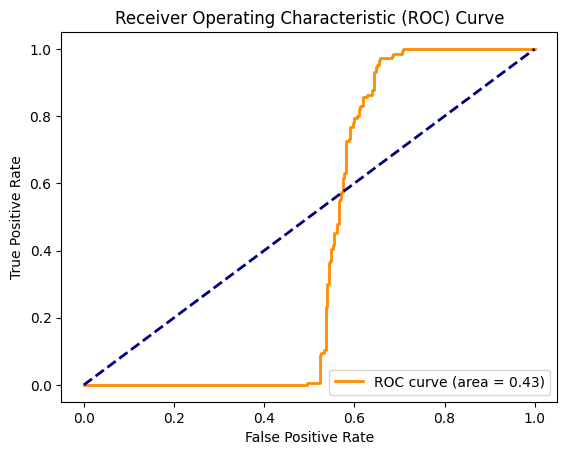


Processed dataset saved as 'processed_amazon_reviews.csv'.

Ensemble model saved as 'sentiment_ensemble_model.pkl'.


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Step 14: Ensemble Using Voting Classifier (using SVC for compatibility)
svc = SVC(probability=True, random_state=42)  # SVC supports 'probability' which is needed for ROC

# Creating the Voting Classifier with RandomForest and SVC
ensemble = VotingClassifier(estimators=[('rf', best_rf), ('svc', svc)], voting='soft')
ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)
print("\nEnsemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

# Step 15: ROC Curve for Ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 16: Save the Processed Dataset
df.to_csv('processed_amazon_reviews.csv', index=False)
print("\nProcessed dataset saved as 'processed_amazon_reviews.csv'.")

# Step 17: Save the Models for Deployment
import joblib
joblib.dump(ensemble, 'sentiment_ensemble_model.pkl')
print("\nEnsemble model saved as 'sentiment_ensemble_model.pkl'.")

In [ ]:
# Function to clean input text (same as preprocessing function used earlier)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Function to predict sentiment for a new review
def predict_sentiment(review_text, model, tfidf_vectorizer, encoder):
    # Clean the input review text
    cleaned_review = clean_text(review_text)

    # Convert the cleaned review to the same format as the training data using TF-IDF
    review_vectorized = tfidf_vectorizer.transform([cleaned_review]).toarray()

    # Predict sentiment using the model (Random Forest or XGBoost)
    prediction = model.predict(review_vectorized)

    # Decode the sentiment label back to 'positive', 'neutral', 'negative'
    sentiment = encoder.inverse_transform(prediction)

    return sentiment[0]

# Example Input Review
input_review = " bad packaging"

# Predict sentiment using Random Forest
rf_sentiment = predict_sentiment(input_review, best_rf, tfidf, encoder)
print(f"Random Forest Prediction: {rf_sentiment}")

# Predict sentiment using XGBoost
xgb_sentiment = predict_sentiment(input_review, xgb, tfidf, encoder)
print(f"XGBoost Prediction: {xgb_sentiment}")


Random Forest Prediction: positive
XGBoost Prediction: positive


# Larger datset used here


Dataset Loaded. Shape: (28332, 2)

Shape after dropping missing values: (28332, 2)

Sentiment Distribution:
sentiment
positive    25545
negative     1581
neutral      1206
Name: count, dtype: int64

Sample Cleaned Reviews:
                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                     cleaned_reviews  
0  i order of them and one of the item is bad qua...  
1  bulk is always the less expensive way to go fo...  
2  well they are not duracell but for the price i...  
3  seem to work as well as name brand batteries a...  
4  these batteries are very long lasting the pric...  


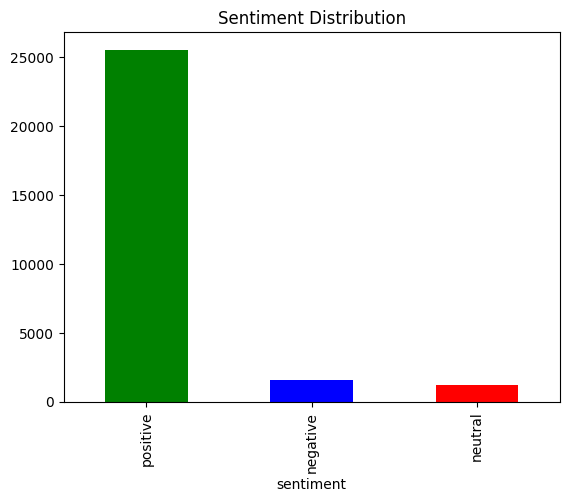

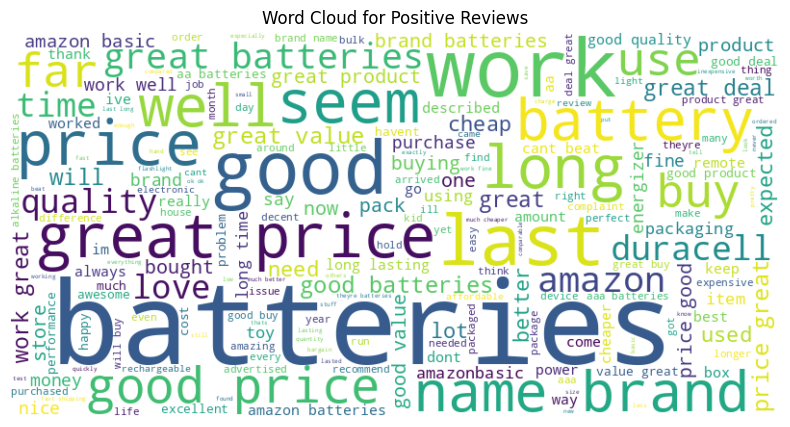

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After SMOTE:
sentiment
neutral     25545
positive    25545
negative    25545
Name: count, dtype: int64

Accuracy Score: 0.8266457884778495

Confusion Matrix:
 [[4085  881  213]
 [ 306 4316  467]
 [ 248  542 4269]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.79      0.83      5179
     neutral       0.75      0.85      0.80      5089
    positive       0.86      0.84      0.85      5059

    accuracy                           0.83     15327
   macro avg       0.83      0.83      0.83     15327
weighted avg       0.83      0.83      0.83     15327


Processed dataset saved as 'processed_amazon_reviews.csv'.


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

# Step 1: Load the Dataset (Only read relevant columns to save memory)
df = pd.read_csv('/content/amazon_large_datset.csv', usecols=['reviews.text', 'reviews.rating'])
print("Dataset Loaded. Shape:", df.shape)

# Step 2: Drop Missing Values in 'reviews.text'
df = df.dropna(subset=['reviews.text'])
print("\nShape after dropping missing values:", df.shape)

# Step 3: Assign Sentiments Based on Ratings
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(assign_sentiment)

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Step 4: Preprocess Text (Optimize by processing in batches)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra spaces
    return text

df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)
print("\nSample Cleaned Reviews:")
print(df[['reviews.text', 'cleaned_reviews']].head())

# Step 5: Visualize Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Distribution')
plt.show()

# Step 6: Generate a Word Cloud for Positive Reviews (Limit the amount of text to avoid memory overload)
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_reviews'].head(5000))  # limit to 5000 for memory
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Step 7: Feature Extraction with TF-IDF (Use sparse matrix)
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_sparse = tfidf.fit_transform(df['cleaned_reviews'])  # sparse matrix, avoid .toarray()

# Step 8: Handle Class Imbalance with SMOTE (Apply SMOTE to sparse matrix)
y = df['sentiment']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sparse, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 9: Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 10: Train Random Forest Classifier (Train the model with a smaller dataset if needed)
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Step 11: Evaluate the Model
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Save the Processed Dataset (Optional)
df.to_csv('processed_amazon_reviews.csv', index=False)
print("\nProcessed dataset saved as 'processed_amazon_reviews.csv'.")


From here we can see that the size of dataset increases the accuracy of random forest is decreases
